# Tensorflow Transfer Learning | Image classification

**Introduction**

I really enjoyed Tensorflow Developer Specialization and Deep Learning Specialization from coursera. 

After that I thought let’s build cool application and apply whatever I learned from these courses. I thought getting images of yoga poses would easier and building yoga pose classifier would be fun exercise.

Later, I found the yoga pose image dataset is available at Kaggle website and downloaded to built convolution neural network model from scratch using tensorflow but didn't get accuracy more than 20% on training dataset. Even after trying most of optimization and regularization techniques (like batch normalization, dropouts, data augmentation, dropouts, L2 regularization, changing learning rate, Adam, RMSProp optimizations, training up to 1000 epochs, different batch size etc.), I did not see much improvement.  I almost lost the hope that while doing course exercise, I easily got 96% accuracy on dataset provided in courses but quite difficult to get from real word image dataset.

Both courses emphasize that for relatively small dataset, applying transfer learning may improve the performance significantly and may get high accuracy easily.

I applied transfer learning with fine tune and got approx. 95% accuracy on training dataset although validation accuracy was much less than training accuracy, but still I was happy with this performance, and it was giving decent performance on real world yoga pose images.




**What is Transfer Learning?**


Transfer learning is one of the most important techniques of deep learning. When building a vision system to solve a specific problem, you usually need to collect and label a huge amount of data to train your network. You can build your own CNN and start the training from scratch; that is an acceptable approach. But what if you could download an existing neural network that someone else has tuned and trained, and use it as a starting point for your new task? Transfer learning allows you to do just that. You can download an open-source model that someone else has already trained and tuned and use their optimized parameters (weights) as a starting point to train your model on a smaller dataset for a given task. This way, you can train your network a lot faster and achieve higher results.

Deep Learning researchers and practitioners have posted many research papers and open-source projects of trained algorithms that they have worked on for weeks and months and trained on GPUs. Often, the fact that someone else has done this work and gone through the painful high-performance research process means you can download an open-source architecture and weights and use them as a good start for your own neural network. This is transfer of knowledge from a pretrained network in one domain to your own problem in a different domain.

Transfer learning is transferring the knowledge that the network has acquired from one task, where we have a massive amount of data, to a new task where small set of data is available.


**Trasfer learning high level workflow:**

1. Take layers from a previously trained model.
2. Freeze them to avoid destroying any of the information they contain during future training rounds.
3. Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.
4. Train the new layers on your dataset.


I used base model MobileNetV2 with weights 'imagenet' and wrapper classes I created are kind of reusable classes and can be applied to any image classification problem and thought of sharing with all of you.


I have created transfer learning apis that you can easily use to create image classifier with few lines of code. You can find the latest code and examples from below git repository which I am continuously improving.

https://github.com/Pawanesh/DeepLearning



**Image classification easy to use transfer learning APIs**

I have created transfer learning apis that you can easily use to create accurate image classifier with few lines of code.

a) Get data training and validation dataset directories

import os
import numpy as np
import tensorflow as tf

baseDir = os.path.join(os.environ['PWD'], 'YogaModel/dataset')
trainDir = os.path.join(baseDir, 'training')
validationDir = os.path.join(baseDir, 'testing')
modelDir = os.path.join(os.environ['PWD'], 'YogaPoseModel')
modelName = 'YogaPoseModel'

b) Create imageData, baseModel and model objects.

from DeepLearning.TransferLearningImage.TransferLearningImageData import TransferLearningImageData
from DeepLearning.TransferLearningImage.TransferLearningImageBaseModel import TransferLearningImageBaseModel
from DeepLearning.TransferLearningImage.TransferLearningImageModel import TransferLearningImageModel

imageData = TransferLearningImageData(trainPath=trainDir, validationPath=validationDir)
baseModel = TransferLearningImageBaseModel(imageShape=imageData.getImageShape())
model = TransferLearningImageModel(imageData = imageData
                                   , baseModel = baseModel
                                   , modelDirectory = modelDir
                                   , modelName = modelName
                                  )
                                          
  c) Train model - It will train and save the model file.
          
  model.train()
          
  d) Plot the training and validation accuracy
      
  model.plotPerformance()
          
  e) Predict the classifications
          
  label, className = model.predict(image)
          
  f) You can load already created model as well
  
  loadedModel = model.load(modelFileName)

**Creating yoga pose classifier**

 We will understand transfer learning apis by creating simple yoga pose classifier.

In [4]:
# 1. Download the yoga pose dataset and trasfer learning python modules from my git repository.

# a) Download the yoga pose dataset in current directory 
!git clone https://github.com/Pawanesh/YogaModel
    
# b) Download transfer learning framework in current directory
!git clone https://github.com/Pawanesh/DeepLearning

In [5]:
# 2. Import Tensorflow and TransferLearning modules

import os
import numpy as np
import tensorflow as tf

from DeepLearning.TransferLearningImage.TransferLearningImageData import TransferLearningImageData
from DeepLearning.TransferLearningImage.TransferLearningImageBaseModel import TransferLearningImageBaseModel
from DeepLearning.TransferLearningImage.TransferLearningImageModel import TransferLearningImageModel


In [7]:
#3. Define dataset training and validation directories and model name.

# Get dataset base directory
baseDir = os.path.join(os.environ['PWD'], 'YogaModel/dataset')

#Get training dataset directory
trainDir = os.path.join(baseDir, 'training')

#Get validation dataset directory
validationDir = os.path.join(baseDir, 'testing')

#Define output directory to save the model
modelDir = os.path.join(os.environ['PWD'], 'YogaPoseModel')

#Define model file name
modelName = 'YogaPoseModel'

In [8]:
#4. Create simple yoga classifier using tensorflow transfer learning apis

#Create imageData object using training and validation dataset
imageData = TransferLearningImageData(trainPath=trainDir, validationPath=validationDir)

#Create baseModel object which defaults to base model MobileNetV2 with weights 'imagenet'
baseModel = TransferLearningImageBaseModel(imageShape=imageData.getImageShape())

#Create tensorflow transfer learning model using imageData and baseModel objects.
model = TransferLearningImageModel(imageData = imageData
                                   , baseModel = baseModel
                                   , modelDirectory = modelDir
                                   , modelName = modelName
                                  )

In [9]:
# 5. Train model and plot the performance
# a) Usually it takes few hours to train with default parameter on GPUs.
# b) If you don't have much time, you can skip this step 5.
# c) I have alread trained and saved model for you and you can load and test it from next steps.

# model.train()

# model.plotPerformance()

**Performance plot after training**

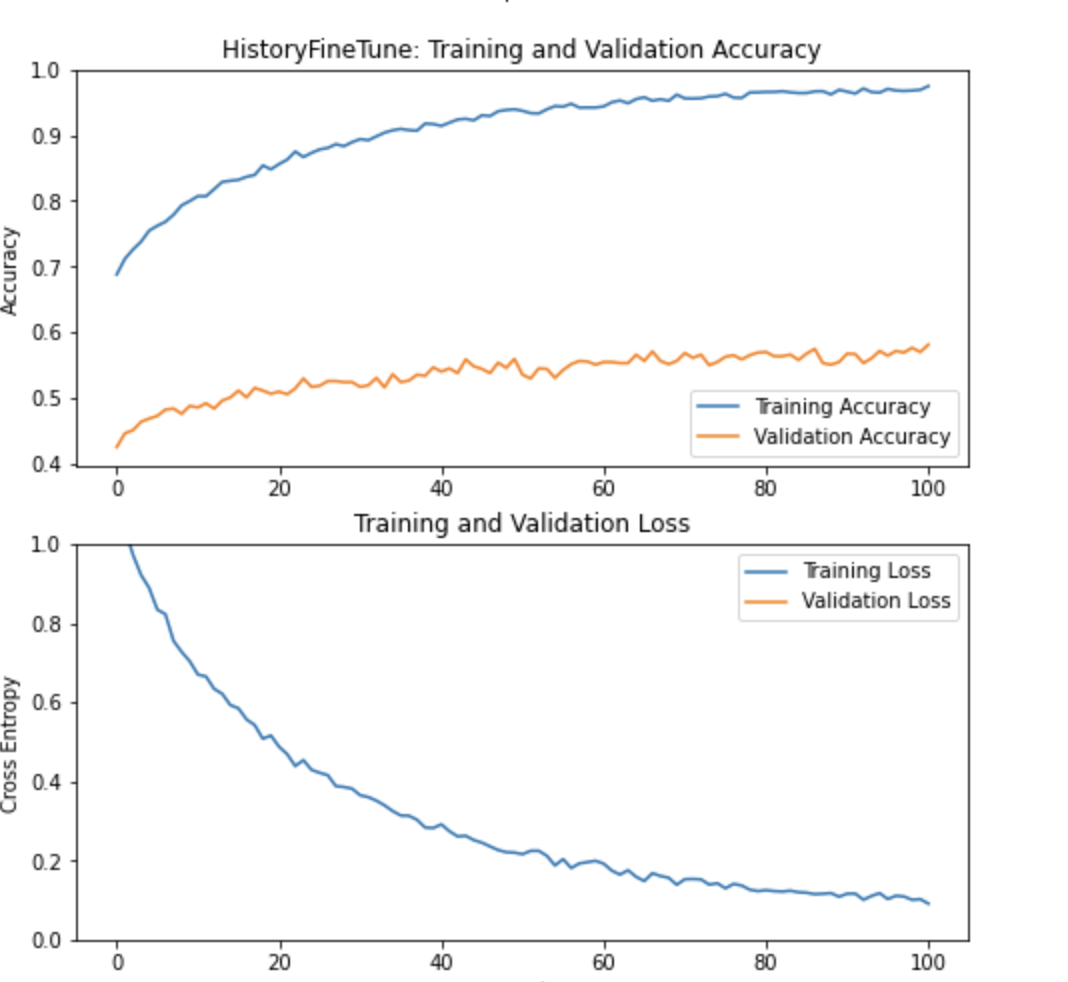

In [7]:
# 6. Load already trained saved model.
# a) You need excute this step, only if you have not executed step 5 i.e. trained the model.

model.load(os.path.join(os.environ['PWD'], 'YogaModel/src/YogaModelTransferLearningFineTune.h5'))



In [11]:
#7 Predict the class adho mukha svanasana from test dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


imageFile = '/kaggle/working/YogaModel/dataset/testing/adho mukha svanasana/17. screen_shot_2014-03-20_at_2.05.15_pm.png'
img = mpimg.imread(imageFile)
imgplot = plt.imshow(img)
plt.show()

label, className = model.predict(imageFile)

print('Image: ' + imageFile)
print('Label: ' + str(label))
print('ClassName: ' + className)

In [12]:
#8 Predict the class yoganidrasana from test dataset
imageFile = '/kaggle/working/YogaModel/dataset/testing/yoganidrasana/33-0.png'


img = mpimg.imread(imageFile)
imgplot = plt.imshow(img)
plt.show()

label, className = model.predict(imageFile)

print('Image: ' + imageFile)
print('Label: ' + str(label))
print('ClassName: ' + className)

This exercise ends here. Next section gives details about transfer learning APIs for your reference and feel free to enhance it.

In [15]:
#8 You can save the model in tflite format for mobile decvice application development.
model.saveLite()

In [17]:
!tree YogaPoseModel

# Transfer Learning APIs

Please find complete reference of transfer learning modules and detail explantion.





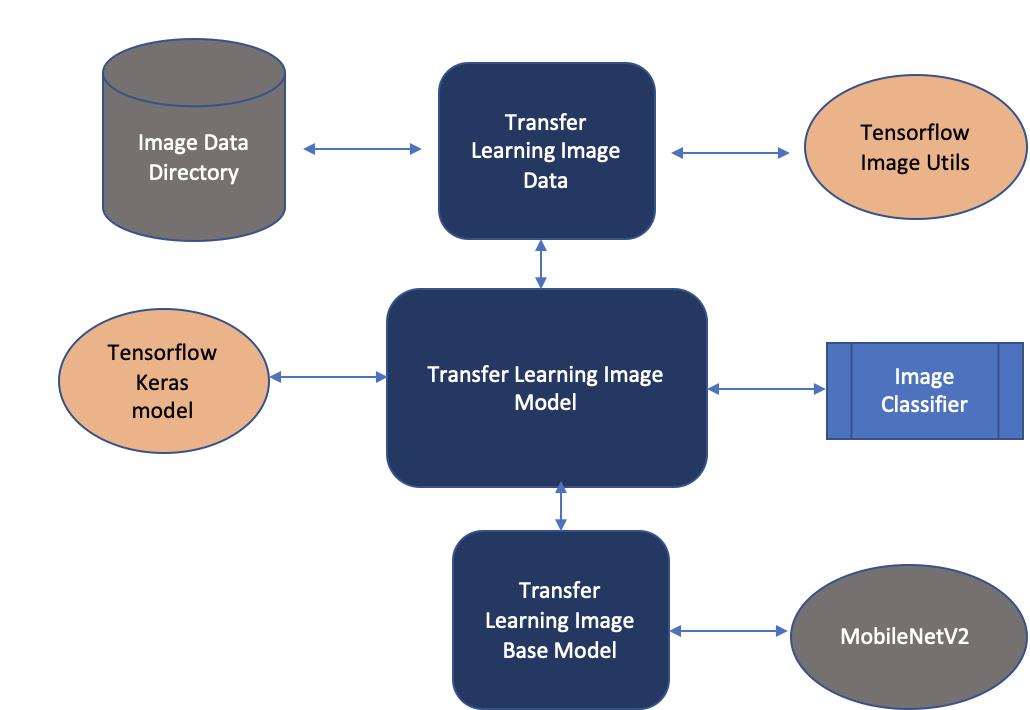

**TransferLearningImageData**

1. TransferLearningImageData class encapsulates image data processing.
2. It is responsible to load training and validation dataset from image directory.
3. It uses tensorflow iamge utils to load the dataset and label them.
4. It defines and provides apis for image data informations like labels, classes, image size, image shape etc.


In [ ]:
# TransferLearningImageData class definition

import os
import numpy as np
import tensorflow as tf

class TransferLearningImageData:
    "Image data for transfer learning model data."
    
    def __init__(self
                , imageSize = (160,160)
                , batchSize = 32
                , shuffle = True
                , trainPath = None
                , testPath = None
                , validationPath = None
                , randomFlip = 'horizontal'
                , randomRotation = 0.2):
        
        self.imageSize = imageSize
        self.imageShape = imageSize + (3,)
        self.batchSize = batchSize
        self.shuffle = shuffle
        self.trainPath = trainPath
        self.testPath = testPath
        self.validationPath = validationPath
        self.trainData = None
        self.testData = None
        self.validationData = None
        self.randomFlip = randomFlip
        self.randomRotation = randomRotation
        
        self.load()
        
    def load(self):
        if self.trainPath:
            self.trainData = tf.keras.utils.image_dataset_from_directory(
                                                    self.trainPath,
                                                    shuffle=self.shuffle,
                                                    batch_size = self.batchSize,
                                                    image_size=self.imageSize
                                                )
            
            
        if self.testPath:
            self.testData = tf.keras.utils.image_dataset_from_directory(
                                                    self.testPath,
                                                    shuffle=self.shuffle,
                                                    batch_size = self.batchSize,
                                                    image_size=self.imageSize
                                                )
            
        if self.validationPath:
            self.validationData = tf.keras.utils.image_dataset_from_directory(
                                                    self.validationPath,
                                                    shuffle = self.shuffle,
                                                    batch_size = self.batchSize,
                                                    image_size = self.imageSize
                                                )
            
    def getTrainDataSet(self):
        return self.trainData
    
    def getTestDataSet(self):
        return self.testData
    
    def getValidationDataSet(self):
        return self.validationData
    
    def getImageSize(self):
        return self.imageSize
    
    def getImageShape(self):
        return self.imageShape
    
    def getClassSize(self):
        return len(self.trainData.class_names)
    
    def getRandomFlip(self):
        return self.randomFlip
    
    def getRandomRotation(self):
        return self.randomRotation

    def getClassName(self, label):
        return self.trainData.class_names[label]
        

**TransferLearningImageBaseModel**
1. TransferLearningImageBaseModel class defines base model of transfer learning.
2. It defaults to MobileNetV2 base model with weights imagenet.
3. It defines preprocesing input layer for base model.
4. It sets base model trainable attribute to false to avoid any change in base model's weights during traning.
5. It provides api to return base model object.


In [ ]:
# TransferLearningImageBaseModel class definition

import os
import numpy as np
import tensorflow as tf


class TransferLearningImageBaseModel:
    "Base model for image classification."
    
    def __init__(self 
                 , baseModelName = 'MobileNetV2' 
                 , weights = 'imagenet'
                 , imageShape = None
                ):
        
        self.baseModel = None
        self.preProcessInput = None
        if baseModelName == 'MobileNetV2':
            self.baseModel = tf.keras.applications.MobileNetV2(
                input_shape=imageShape,
                include_top=False,
                weights=weights
            )
            self.baseModel.trainable = False
            self.preProcessInput = tf.keras.applications.mobilenet_v2.preprocess_input
            
    def getPreProcessInput(self):
        return self.preProcessInput
    
    def __call__(self, x):
        return self.baseModel(x, training=False)
    
    def get(self):
        return self.baseModel


**TransferLearningImageModel**

1. TransferLearningImageModel class is responsible to train, save and load the model.
2. It accepts imageData and baseModel objects of previous classes.
3. It defaults deep learning hyper parameters like learningRate, dropouts etc.
4. It sets optimizer and loss for gradient descent backpropagation.
5. It creates the model.
6. It defines input layer of model.
7. It defines augmentation layer.
8. It uses base model object to define base model layers.
9. It defines dropout layers.
10. It defines prediction layer.
11. It uses tensorflow functional apis to create the model.
12. It provides api to train the model with fine tune.
13. It saves the model and can be loaded again.
14. It provides apis to compile and recompile model for training.
15. It provides apis to plot the performance and summary of model.
16. It provides api to predict the class label of new images.
17. It provides api to save model in tflite format for mobile application development.

In [ ]:
# TransferLearningImageModel class definition

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

class TransferLearningImageModel:
    "A neural network model based on transfer learning for image classification."
    
    def __init__(self
                 , imageData
                 , baseModel
                 , learningRate = 0.0001
                 , dropouts = 0.2
                 , optimizer = tf.keras.optimizers.Adam()
                 , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
                 , metrics = ['accuracy']
                 , modelDirectory = os.environ['PWD']
                 , modelName = 'Model'
                ):
        
        self.imageData = imageData
        self.baseModel = baseModel
        self.learningRate = learningRate
        self.dropouts = dropouts
        self.optimizer = optimizer
        self.optimizer.lr.assign(learningRate)
        self.loss = loss
        self.metrics = metrics
        self.modelDirectory = modelDirectory
        self.modelName = modelName
        
        self.model = self.create()
        self.compile()
        
    def create(self):
        inputs = self.inputLayer()
        x = self.augmentationLayer()(inputs)
        x = self.baseModelLayers(x)
        x = tf.keras.layers.GlobalAveragePooling2D()(x)
        x = self.dropoutLayer()(x)
        outputs = self.predictionLayer()(x)
        return tf.keras.Model(inputs, outputs)
    
    def inputLayer(self):
        return tf.keras.layers.Input(shape=self.imageData.getImageShape())
    
    def augmentationLayer(self):
        return tf.keras.Sequential([
                    tf.keras.layers.RandomFlip(self.imageData.getRandomFlip()),
                    tf.keras.layers.RandomRotation(self.imageData.getRandomRotation()),
                ])
    
    def baseModelLayers(self, x):
        x = self.baseModel.getPreProcessInput()(x)
        x = self.baseModel(x)
        return x
    
    def dropoutLayer(self):
        return tf.keras.layers.Dropout(self.dropouts)
    
    def predictionLayer(self):
        return tf.keras.layers.Dense(self.imageData.getClassSize())
    

    
    def compile(self):
        self.model.compile(
                    optimizer=self.optimizer
                    , loss=self.loss
                    , metrics = self.metrics
                )
        
    def recompile(self, learningRateFactor):
        self.model.compile(
                    optimizer=tf.keras.optimizers.Adam(learning_rate=self.learningRate/learningRateFactor)
                    , loss=self.loss
                    , metrics = self.metrics
                )
    
    def train(self
                , initiaEepochs = 100
                , fineTuneEpochs = 100
                , fineTuneAt = 100
                , learningRateFactor=10,
                verbose = 0):
        self.history = self.model.fit(self.imageData.getTrainDataSet(),
                                epochs=initiaEepochs,
                                validation_data=self.imageData.getValidationDataSet(),
                                verbose = verbose)
        
        
        self.baseModel.get().trainable = True
        
        for layer in self.baseModel.get().layers[:fineTuneAt]:
            layer.trainnable = False
        
        self.recompile(learningRateFactor)
        self.historyFineTune = self.model.fit(self.imageData.getTrainDataSet(),
                                     epochs=initiaEepochs + fineTuneEpochs,
                                     initial_epoch=self.history.epoch[-1],
                                     validation_data=self.imageData.getValidationDataSet())

        
        self.save()
        return self.history, self.historyFineTune
    
    def save(self):
        self.model.save(os.path.join(self.modelDirectory, self.modelName + ".h5"))
    
    def saveLite(self):
        savedDir = os.path.join(self.modelDirectory, 'saved')
        tf.saved_model.save(self.model, savedDir)
        
        converter = tf.lite.TFLiteConverter.from_saved_model(savedDir)
        tfliteModel = converter.convert()
        
        tfliteDir = os.path.join(self.modelDirectory, 'tflite')
        tfliteModelFile = pathlib.Path(os.path.join(tfliteDir, self.modelName + '.tflite'))
        tfliteModelFile.write_bytes(tfliteModel)
        
    def load(self, modelPath=None):
        if modelPath is None:
            self.model = tf.keras.models.load_model(os.path.join(self.modelDirectory, self.modelName + ".h5"))
        self.model = tf.keras.models.load_model(modelPath)

    def plotPerformance(self):
        self.plotHistory(self.history, 'History')
        self.plotHistory(self.historyFineTune, 'HistoryFineTune')
        
    def plotHistory(self, history, name):
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']

        loss = history.history['loss']
        val_loss = history.history['val_loss']

        plt.figure(figsize=(8, 8))
        plt.subplot(2, 1, 1)
        plt.plot(acc, label='Training Accuracy')
        plt.plot(val_acc, label='Validation Accuracy')
        plt.legend(loc='lower right')
        plt.ylabel('Accuracy')
        plt.ylim([min(plt.ylim()),1])
        plt.title(name + ': Training and Validation Accuracy')

        plt.subplot(2, 1, 2)
        plt.plot(loss, label='Training Loss')
        plt.plot(val_loss, label='Validation Loss')
        plt.legend(loc='upper right')
        plt.ylabel('Cross Entropy')
        plt.ylim([0,1.0])
        plt.title('Training and Validation Loss')
        plt.xlabel('epoch')
        plt.show()
        
    def summary(self):
        return self.model.summary()

    def predict(self, image_path):
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=self.imageData.getImageSize())

        img_array = tf.keras.utils.img_to_array(image)
        img_array = tf.expand_dims(img_array, 0) # Create a batch

        predictions = self.model.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        label = np.argmax(score)
        return label, self.imageData.getClassName(label)


This is the end of document. Thank you!